In [1]:
%load_ext autoreload
%autoreload 2

from pygtfcode import Config, State
from pprint import pprint

# Instantiate config object and set some parameters

In [2]:
config = Config()

In [3]:
config.init = 'truncated_NFW'

In [4]:
config

Config(
  io=IOParams(base_dir='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests', chatter=True, drho_prof=0.1, drho_tevol=0.01, logpath='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests/Model000/logfile.txt', model_dir='Model000', model_no=0, overwrite=True, tlog=100000),
  grid=GridParams(rmin=0.01, rmax=100.0, ngrid=200),
  init=TruncatedNFWParams(Mvir=3000000000.0, cvir=20.0, z=0.0, Zt=0.05938, deltaP=0.0001),
  sim=SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0),
  prec=PrecisionParams(eps_dr=1e-12, eps_dt=0.001, eps_du=0.001, epsabs=1e-06, epsrel=1e-06, max_iter_dr=20000, max_iter_du=10, max_iter_v2=10)
)

# Instantiate State

In [5]:
state = State(config)

Computing characteristic parameters for simulation...
Generating lookup for rho(phi)...
Computing potential profile for truncated NFW halo...
Integrating Poisson equation outward: r = 116.775067, phi = 0.000002
Setting up radial grid...
Initializing profiles...
Computing Menc: r = 100.000, m = 2.657
Generating lookup for v2 integrand...
Computing v2: r = 97.739, v2 = 0.001
State initialized.
Created directory: /Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests/Model000


In [6]:
state.run()


Initial profiles written to disk.
Log file initialized:
      step          time            dt         rho_c         v_max        Kn_min
         0  0.000000e+00  1.000000e-06  1.480933e+02  3.066865e-01  1.091878e+01
Time evolution file initialized.
    100000  9.565632e+00  1.989004e-04  3.181506e+00  3.025131e-01  2.598357e+01
    200000  1.740005e+01  4.781697e-05  2.758715e+00  3.001832e-01  2.739340e+01
    300000  2.849319e+01  3.666459e-05  2.566538e+00  2.987194e-01  2.808868e+01
    400000  4.086740e+01  3.600350e-05  2.516993e+00  2.986541e-01  2.817840e+01
    500000  5.299933e+01  3.498612e-05  2.538044e+00  2.996586e-01  2.793957e+01
    600000  6.476659e+01  3.378567e-05  2.595687e+00  3.006633e-01  2.753514e+01
    700000  7.612139e+01  3.250395e-05  2.676064e+00  3.015151e-01  2.704177e+01
    800000  8.704269e+01  3.120102e-05  2.772470e+00  3.022783e-01  2.650032e+01
    900000  9.751660e+01  2.991170e-05  2.881186e+00  3.029856e-01  2.593480e+01
   1000000  1.075453

KeyboardInterrupt: 

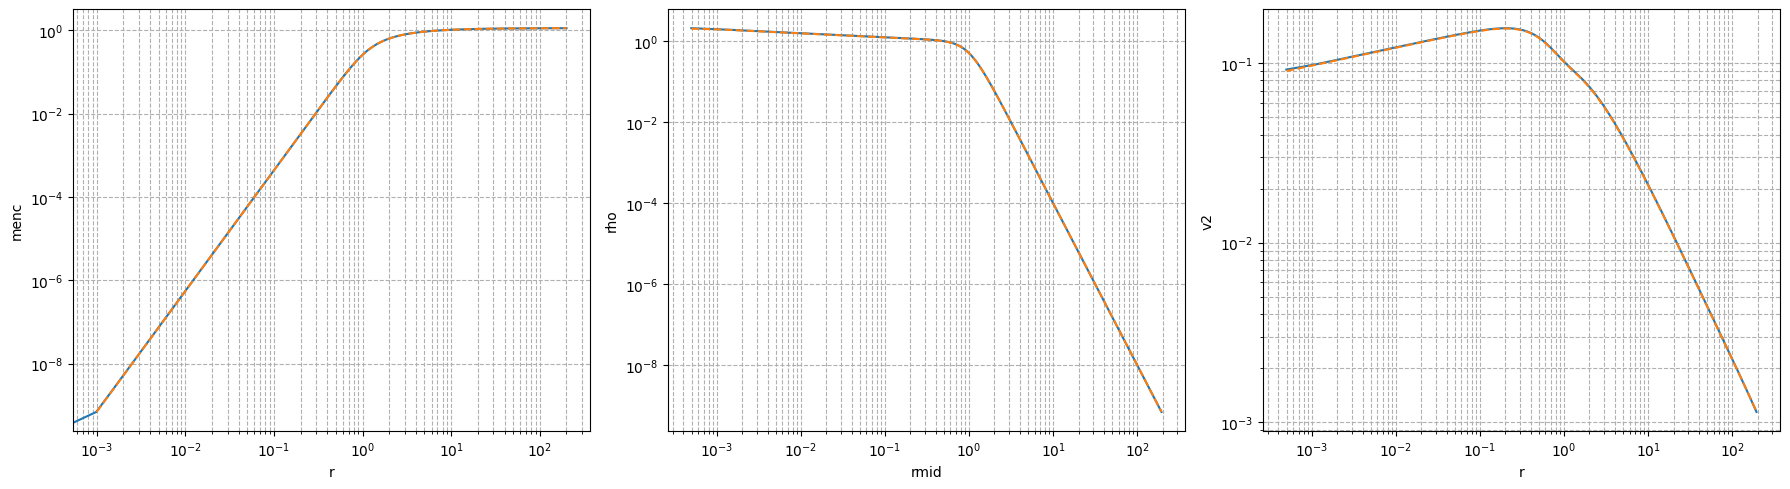

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Load and plot data from the Fortran output file
fortran_data = np.loadtxt('/Users/yaronetokayer/gtfcode/debug_abg.txt')

r_f = fortran_data[:, 0]
rmid_f = fortran_data[:, 1]
m_f = fortran_data[:, 2]
rho_f = fortran_data[:, 3]
v2_f = fortran_data[:, 4]

# Plot 1: Mass profile
axs[0].loglog(state.r, state.m)
axs[0].loglog(r_f, m_f, linestyle='--')
axs[0].set_xlabel('r')
axs[0].set_ylabel('menc')
axs[0].grid(True, which="both", ls="--")

# Plot 2: density profile
axs[1].loglog(state.rmid, state.rho)
axs[1].loglog(rmid_f, rho_f, linestyle='--')
axs[1].set_xlabel('rmid')
axs[1].set_ylabel('rho')
axs[1].grid(True, which="both", ls="--")

# Plot 2: Density profile
# axs[2].loglog(state.rmid, state.rho_interp(state.pot_interp(state.rmid)))
# axs[2].set_xlabel('rmid')
# axs[2].set_ylabel('rho_interp')
# axs[2].grid(True, which="both", ls="--")

# Plot 3: Velocity dispersion profile
axs[2].loglog(state.rmid, state.v2)
axs[2].loglog(rmid_f, v2_f, linestyle='--')
axs[2].set_xlabel('r')
axs[2].set_ylabel('v2')
axs[2].grid(True, which="both", ls="--")

# # Plot 3: Velocity dispersion profile
# axs[1].loglog(state.rho_interp.x, state.rho_interp(state.rho_interp.x))
# axs[1].set_xlabel('potential')
# axs[1].set_ylabel('rho_interp')
# axs[1].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

In [ ]:
index = [0, 20, 60]

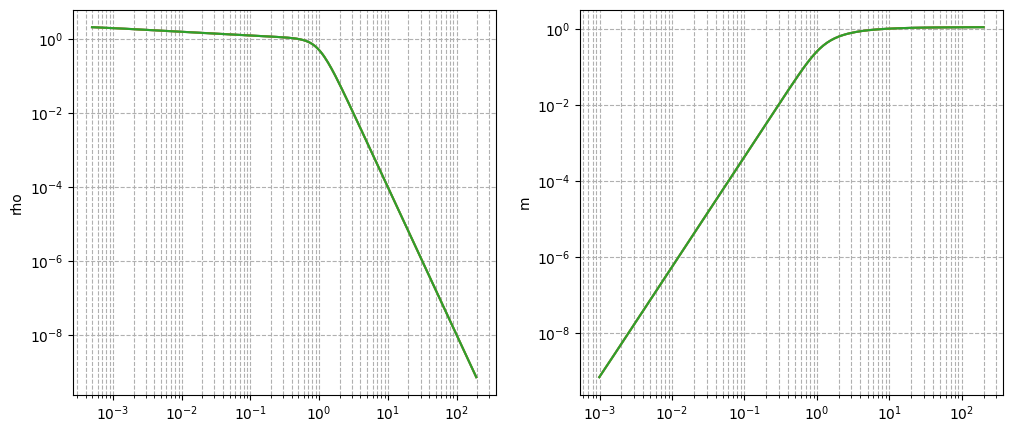

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i in index:
    filename = f'/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests/Model000/profile_{i}.dat'
    data = np.loadtxt(filename, skiprows=1)
    r_out = 10**data[:,1]
    rmid = 10**data[:,2]
    m = data[:,3]
    rho = data[:,4]

    axs[0].loglog(rmid, rho)
    axs[0].set_ylabel('rho')
    axs[0].grid(True, which="both", ls="--")

    axs[1].loglog(r_out, m)
    axs[1].set_ylabel('m')
    axs[1].grid(True, which="both", ls="--")